# Session 6: Three ways of differentiation

Date: 10/23/2017, Monday

In [1]:
format compact

There are 3 major ways to compute the derivative $f'(x)$

- Symbolic differentiation
- Numerical differentiation
- Automatic differentiation

You are already familiar with the first two. The last one is **not required** by this class, but it is just too good to miss. It is the core of modern deep learning engines like Google's [TensorFlow](https://www.tensorflow.org), which is used for training [AlphaGo Zero](https://www.nature.com/nature/journal/v550/n7676/full/nature24270.html). Here we only give a very basic introduction. Enthusiasts can read
*Baydin A G, Pearlmutter B A, Radul A A, et al. Automatic differentiation in machine learning: a survey*

Let's compare the pros and cons of each method.

## Symbolic differentiation

### MATLAB toolbox

MATLAB provides [symbolic tool box](https://www.mathworks.com/products/symbolic.html) for symbolic differentiation. It can assist your mathetical analysis and can be used to verify the numerical differentiation results.

In [2]:
syms x

Consider this function 
$$
f(x) = \frac{1-e^{-x}}{1+e^{-x}}
$$

In [3]:
f0 = (1-exp(-x))/(1+exp(-x))

f0 =
-(exp(-x) - 1)/(exp(-x) + 1)


The first-order derivative is

In [4]:
f1 = diff(f0,x)

f1 =
exp(-x)/(exp(-x) + 1) - (exp(-x)*(exp(-x) - 1))/(exp(-x) + 1)^2


We can keep calculating higher-order derivatives

In [5]:
f2 = diff(f1,x)

f2 =
(2*exp(-2*x))/(exp(-x) + 1)^2 - exp(-x)/(exp(-x) + 1) + (exp(-x)*(exp(-x) - 1))/(exp(-x) + 1)^2 - (2*exp(-2*x)*(exp(-x) - 1))/(exp(-x) + 1)^3


In [6]:
f3 = diff(f2,x)

f3 =
exp(-x)/(exp(-x) + 1) - (6*exp(-2*x))/(exp(-x) + 1)^2 + (6*exp(-3*x))/(exp(-x) + 1)^3 - (exp(-x)*(exp(-x) - 1))/(exp(-x) + 1)^2 + (6*exp(-2*x)*(exp(-x) - 1))/(exp(-x) + 1)^3 - (6*exp(-3*x)*(exp(-x) - 1))/(exp(-x) + 1)^4


In [7]:
f4 = diff(f3,x)

f4 =
(14*exp(-2*x))/(exp(-x) + 1)^2 - exp(-x)/(exp(-x) + 1) - (36*exp(-3*x))/(exp(-x) + 1)^3 + (24*exp(-4*x))/(exp(-x) + 1)^4 + (exp(-x)*(exp(-x) - 1))/(exp(-x) + 1)^2 - (14*exp(-2*x)*(exp(-x) - 1))/(exp(-x) + 1)^3 + (36*exp(-3*x)*(exp(-x) - 1))/(exp(-x) + 1)^4 - (24*exp(-4*x)*(exp(-x) - 1))/(exp(-x) + 1)^5


In [8]:
f5 = diff(f4,x)

f5 =
exp(-x)/(exp(-x) + 1) - (30*exp(-2*x))/(exp(-x) + 1)^2 + (150*exp(-3*x))/(exp(-x) + 1)^3 - (240*exp(-4*x))/(exp(-x) + 1)^4 + (120*exp(-5*x))/(exp(-x) + 1)^5 - (exp(-x)*(exp(-x) - 1))/(exp(-x) + 1)^2 + (30*exp(-2*x)*(exp(-x) - 1))/(exp(-x) + 1)^3 - (150*exp(-3*x)*(exp(-x) - 1))/(exp(-x) + 1)^4 + (240*exp(-4*x)*(exp(-x) - 1))/(exp(-x) + 1)^5 - (120*exp(-5*x)*(exp(-x) - 1))/(exp(-x) + 1)^6


We see the expression becomes more and more complicated for higher-order derivatives,  even though the original $f(x)$ is fairly simple. 

You can imagine that symbolic diff can be quite inefficient for complicated functions and higher-order derivatives.

### Convert symbol to function

We can [convert MATLAB symbols to functions](https://www.mathworks.com/help/symbolic/matlabfunction.html), and use them to compute numerical values.

In [9]:
f0_func = matlabFunction(f0)

f0_func =
  function_handle with value:
    @(x)-(exp(-x)-1.0)./(exp(-x)+1.0)


`f0` is converted to a normal MATLAB function. It is different from just copying the symbolic expression to MATLAB codes, as it is vectorized over input `x` (notice the `./`).

Same for `f0`'s derivatives:

In [10]:
f1_func = matlabFunction(f1);
f2_func = matlabFunction(f2);
f3_func = matlabFunction(f3);
f4_func = matlabFunction(f4);
f5_func = matlabFunction(f5);

Let's plot all the derivatives.

In [11]:
xx = linspace(-3,3,40); % for plot

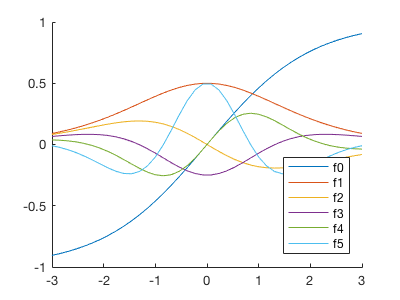

In [12]:
%plot -s 400,300
hold on
plot(xx,f0_func(xx))
plot(xx,f1_func(xx))
plot(xx,f2_func(xx))
plot(xx,f3_func(xx))
plot(xx,f4_func(xx))
plot(xx,f5_func(xx))
legend('f0','f1','f2','f3','f4','f5','Location','SouthEast')

## Numerical differentiation

Is it possible to use the numerical differentiation we learned in class to approximate the 5-th order derivative? Let's try.

In [13]:
y0 = f0_func(xx); % get numerical data

In [14]:
dx = xx(2)-xx(1) % get step size

dx =
    0.1538


We use the **center difference**, which is much more accurate than **forward** or **backward** difference.

$$
f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}
$$

For simplicity, we just throw away the end points `x(1)` and `x(end)`. So the resulted gradient array `y1` is shorter than `y0` by 2 elements. You can also use forward or backward diff to approximate the derivates at the end points. But here we only focus on internal points.

In [15]:
y1 = (y0(3:end) - y0(1:end-2)) / (2*dx);
length(y1)

ans =
    38


The numerical diff highly agrees with the symbolic one!

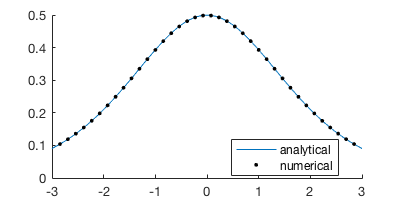

In [16]:
%plot -s 400,200
hold on
plot(xx,f1_func(xx))
plot(xx(2:end-1),y1,'k.')
legend('analytical','numerical','Location','Best')

Then we go to 2-nd order:

In [17]:
y2 = (y1(3:end) - y1(1:end-2)) / (2*dx);
length(y2)

ans =
    36


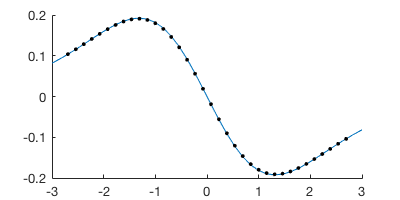

In [18]:
%plot -s 400,200
hold on
plot(xx,f2_func(xx))
plot(xx(3:end-2),y2,'.k')

Also doing well. 3-rd order?

In [19]:
y3 = (y2(3:end) - y2(1:end-2)) / (2*dx);
length(y3)

ans =
    34


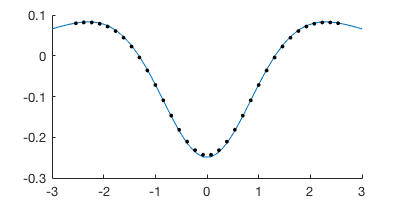

In [20]:
%plot -s 400,200
hold on
plot(xx,f3_func(xx))
plot(xx(4:end-3),y3,'.k')

Looks like center diff is doing a really good job.

4-th order?

In [21]:
y4 = (y3(3:end) - y3(1:end-2)) / (2*dx);
length(y4)

ans =
    32


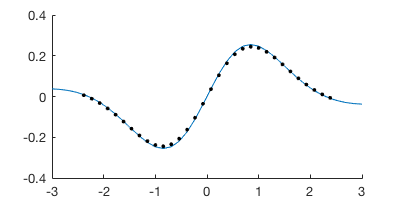

In [22]:
%plot -s 400,200
hold on
plot(xx,f4_func(xx))
plot(xx(5:end-4),y4,'.k')

Some points start to deviate, but not too much.

5-th order? 

In [23]:
y5 = (y4(3:end) - y4(1:end-2)) / (2*dx);
length(y5)

ans =
    30


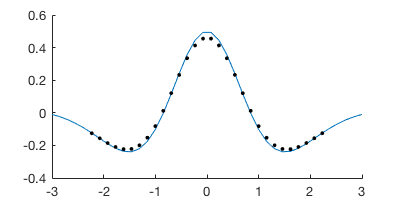

In [24]:
%plot -s 400,200
hold on
plot(xx,f5_func(xx))
plot(xx(6:end-5),y5,'.k')

Now we get some noticeable error! The relative error at the peak is ~10%.

In [25]:
format long
max(y5) % numerical
max(f5_func(xx))  % analytical

ans =
   0.455250196326829
ans =
   0.493735580546680


Even though the center diff is doing a really good job for low-order derivatives, the  error accumulates as the order gets higher. The situation will be even worse for forward or backward diff. Also, the $f(x)$ we choose here is pretty smooth. For a steep $f(x)$, numerical differentiation tends to perform badly.

You might want to use symbolic differentiation instead, but it could be very slow for complicated functions. Is there a better method?

## Automatic differentiation

### Theoretical explanation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) ("autodiff" for short) kind of gets the best of both worlds.

- It is not numerical differentiation. Autodiff has no truncation error. The result is as accurate as symbolic method.
- It is not symbolic differentiation. Autodiff doens't compute the complicated symbolic/analytical expression, so it is much faster than the symbolic way.

How can this magic happen? The easiest explanation is using [dual numbers](https://en.wikipedia.org/wiki/Automatic_differentiation#Automatic_differentiation_using_dual_numbers).

Consider $f(x) = x^2$. Instead of using a real number like 1.0 or 1.5 as the function input, we use a dual number 
$$
x+\epsilon 
$$

where $x$ is still a normal number but $\epsilon$ is a special number with property 

$$
\epsilon^2 = 0
$$

It is analogous to the imaginary unit $i$. You can add or multiply $i$ as usual, but whenever you encounter $i^2$, replace it by -1. Similarly, you can add or multiply $\epsilon$ as usual, but when ever you encounter $\epsilon^2$, replace it by 0. 

$$
f(x+\epsilon) = x^2 + 2x\epsilon +\epsilon^2 = x^2 + 2x\epsilon
$$

The coefficient of $\epsilon$ is?

$2x$ !! which is just $f'(x)$

We didn't perform any "differentiating" at all. Just by carrying an additional "number" $\epsilon$ through a function, we got the derivative of that function as well.

Let's see another example $f(x) = x^3$

$$
(x+\epsilon)^3 = x^3 + 3x^2\epsilon +3x\epsilon^2 + \epsilon^3= x^3 + 3x^2\epsilon
$$

The coeffcient is $3x^2$, which is just the derivative of $x^3$.

How about special functions like $f(x) = e^x$?

$$
e^{x+\epsilon} = e^{x}e^{\epsilon} =
e^{x}(1+\epsilon+\frac{1}{2}\epsilon^2 + ... = e^{x}(1+\epsilon)
$$

The coeffcient of $\epsilon$ is $e^x$, again is the derivative of $e^x$. (If you wonder how can a computer know the Taylor expansion of $e^{\epsilon}$, think about how can a computer calculate $e^x$)

### Code example

MATLAB doesn't have a good autodiff tool, so we use a Python package [autograd](https://github.com/HIPS/autograd) developed by *Harvard Intelligent Probabilistic Systems Group*.

**You don't need to try this package right now (since this is not a Python class), but just keep in mind that if you need a fast and accurate way to compute derivative, there are such tools exist.**

Don't worry if you don't know Python. We will explain as it goes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # contains all plotting functions
import autograd.numpy as np # contains all basic numerical functions
from autograd import grad # autodiff tool

We still differentiate $f(x) = \frac{1-e^{-x}}{1+e^{-x}}$ as in the MATLAB section.

In [2]:
# Define a Python function
# Python has no "end" statement
# It uses code indentation to determine the end of each block
def f0(x):                 
    y = np.exp(-x)
    return (1.0 - y) / (1.0 + y)

In [3]:
# grad(f0) returns the gradient of f0
# f1 is not a symbolic expression!
# It is just a normal numerical function, 
# but it returns the exact gradient thanks to the autodiff magic
f1 = grad(f0)
f2 = grad(f1)
f3 = grad(f2)
f4 = grad(f3)
f5 = grad(f4)

In [4]:
xx = np.linspace(-3, 3, 40) # for plot

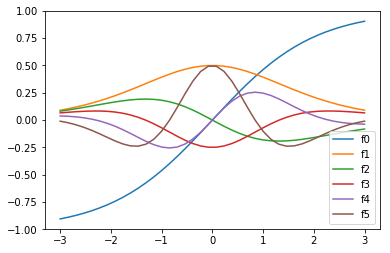

In [5]:
# plot all derivatives
# as in cell[12] of the MATLAB section
plt.plot(xx, f0(xx), label='f0')
plt.plot(xx, f1(xx), label='f1')
plt.plot(xx, f2(xx), label='f2')
plt.plot(xx, f3(xx), label='f3')
plt.plot(xx, f4(xx), label='f4')
plt.plot(xx, f5(xx), label='f5')
plt.legend();

The peak of the 5-th order derivative is the same as the result given by MATLAB symbolic tool box. There's no truncation error here.

In [6]:
f5(xx).max() # the result is exact.

0.49373558054667849

While being able to give the exact result, autodiff is much faster than the symbolic way!

### Another code example: differentiating custom programs

Another advantage of autodiff is that it can differentiate arbitrary **programs**, not just **mathematical expressions**. Many complicated functions cannot be expressed by a combination of basic functions (e.g. the Bessel function in HW5), and in this case symbolic diff will have trouble. 

However, the theory of autodiff is simply "carrying an additional number through your program", so as long as you can **code** the program, you can differentiate it. The dual number will just go through all `while` and `if` statements as usual.

Let's make a weird funcition.

In [7]:
def custom_func(x):
    assert x > 0 # raise an error for negative x
    
    y = 0 # initial value
    
    # Again, Python has no "end" statement
    # It uses code indentation to determine the end of this while block
    while y+x < 10:
        y += x
    
    return y

This function initializes `y` as `0` and keeps accumulating the input `x` to `y`, until `y` reaches 10. In other words

- `y` is a multiple of `x`, i.e. `y=N*x`.
- `y` is smaller than but very close to `10`

For $x=1$, $f(x)=9x=9$, because $10x$ will exceed 10. 

In [8]:
custom_func(1.0)

9.0

For $x=1.2$, $f(x)=8x=9.6$, because $9x=10.8$ will exceed 10. 

In [9]:
custom_func(1.2)

9.6

We can still take derivative of this weird function.

In [10]:
custom_grad = grad(custom_func) # autodiff magic

For $x=1$, $f(x)=9x$, so $f'(x)=9$

In [11]:
print(custom_grad(1.0))

9.0


For $x=1$, $f(x)=8x$, so $f'(x)=8$

In [12]:
print(custom_grad(1.2))

8.0


Symbolic diff will have a big trouble with this kind of function.

## So why use numerical differentiation?

If autodiff is so powerful, why do we need other methods? Well, you need symbolic diff for pure mathematical analysis. But how about numerical diff?

Well, the major application of numerical diff (forward difference, etc.) is not getting the derivative of a known function $f(x)$. It is for solving differential equations

$$
f'(x) = \Phi(f,x)
$$

In this case, $f(x)$ is not known (your goal is to find it), so symbol diff or autodiff can't help you. Numerical diff gives you a way to solve this ODE
$$
\frac{f(x+h) - f(x)}{h} \approx f'(x)  = \Phi(f,x)
$$